# Installing basic dependencies and importing modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install ydata-profiling
!pip install pygwalker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.9/620.9 KB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.1 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport
import pygwalker as pyg

# Importing Datasets and performing EDA

In [ ]:
df_channels = pd.read_csv('/content/drive/MyDrive/datahack/dataset_datahack_channels.csv')
df_videos = pd.read_csv('/content/drive/MyDrive/datahack/dataset_datahack_videos.csv')

In [ ]:
df_channels.drop(df_channels.columns[[0,1]], axis = 1, inplace=True)
df_videos.drop(df_videos.columns[[0,1]], axis = 1, inplace=True)

In [ ]:
ProfileReport(df_channels)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_channels.describe()

view_count  subscriber_count  video_count
count  5.000000e+01      5.000000e+01    50.000000
mean   2.181422e+08      1.178518e+06   661.340000
std    3.750396e+08      1.417683e+06  1264.353616
min    5.141000e+03      4.500000e+01    16.000000
25%    5.733671e+06      9.060000e+04   148.000000
50%    5.764319e+07      5.055000e+05   300.000000
75%    2.971037e+08      1.780000e+06   869.250000
max    1.975052e+09      5.110000e+06  8777.000000

In [ ]:
df_videos.describe()

index  category_id    view_count         likes      comments
count  471.000000   471.000000  4.710000e+02  4.710000e+02    471.000000
mean   368.403397    21.690021  4.160666e+05  2.816723e+04   1044.980892
std    217.156142     6.563397  1.468884e+06  9.570029e+04   4052.111855
min      0.000000     1.000000  3.000000e+00  0.000000e+00      0.000000
25%    181.500000    20.000000  3.014000e+03  1.555000e+02     15.500000
50%    369.000000    23.000000  5.448900e+04  2.726000e+03    135.000000
75%    547.500000    27.000000  3.012735e+05  2.142050e+04    829.000000
max    748.000000    27.000000  1.654122e+07  1.081179e+06  54074.000000

In [ ]:
pyg.walk(df_channels)

In [ ]:
pyg.walk(df_videos)

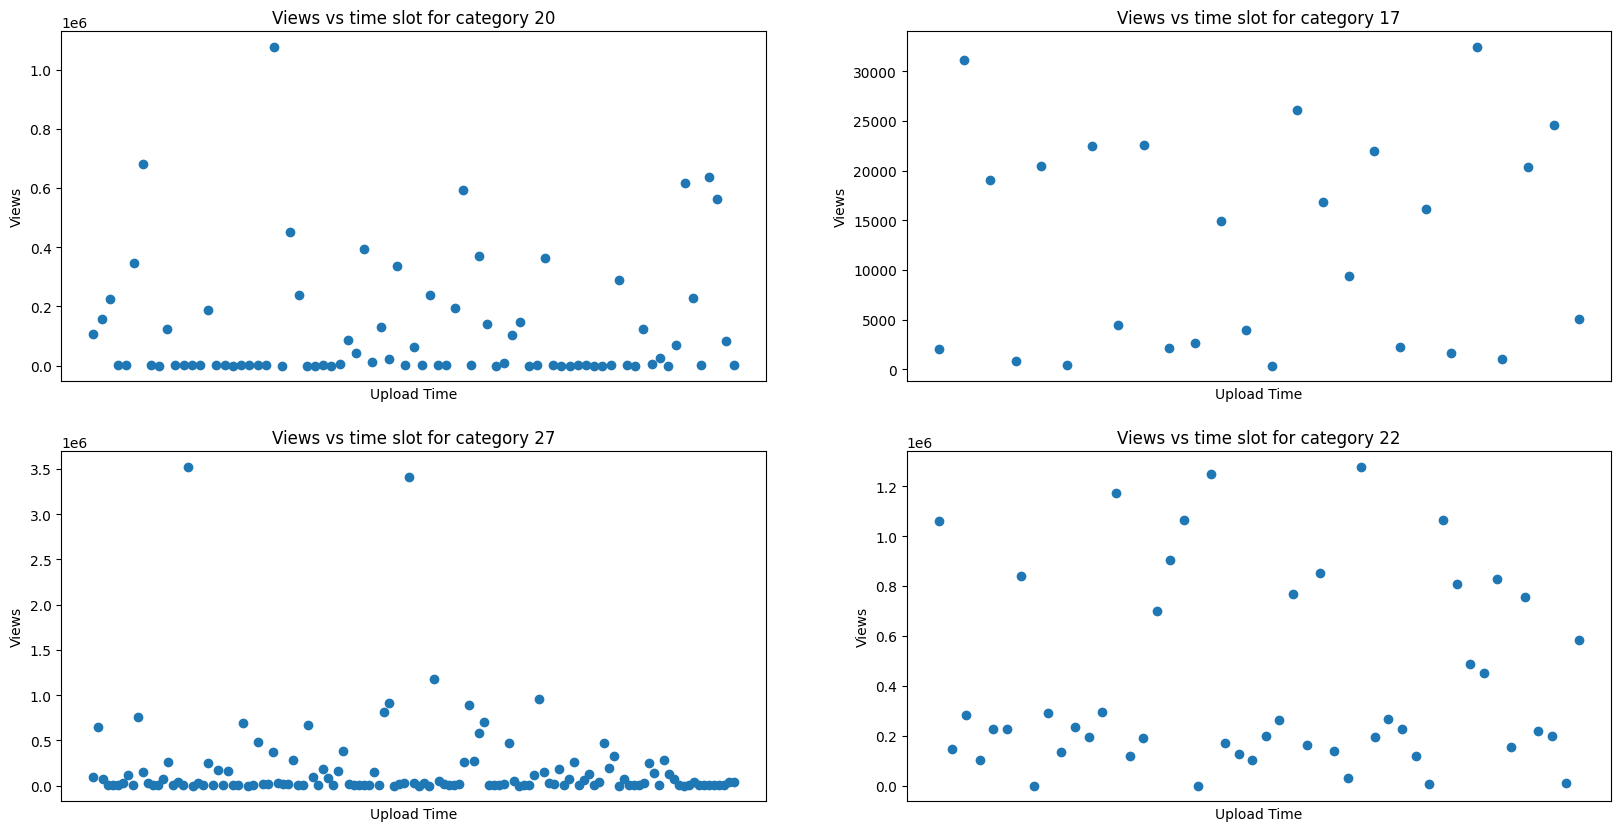

In [ ]:
# plot a scatterplot graph with 'time_slot' and 'view_range' columns
plt.figure(figsize=(20,10))
for i,id in enumerate(df_videos['category_id'].unique()[:4]):
  df_plot = df_videos[df_videos['category_id'] == id]
  plt.subplot(2,2,i+1)
  plt.scatter(df_plot['upload_time'], df_plot['view_count'])

# set the x and y axis labels
  plt.xlabel('Upload Time')
  plt.ylabel('Views')
  plt.xticks([])
  plt.title(f'Views vs time slot for category {id}')

# show the graph
plt.show()

In [ ]:
from datetime import datetime

def convert_to_datetime(date_string):
    formats = ['%Y-%m-%dT%H:%M:%SZ', '%Y-%m-%dT%H:%M:%S.%fZ']
    for fmt in formats:
        try:
            return datetime.strptime(date_string, fmt)
        except ValueError:
            pass
    raise ValueError(f"No valid datetime format found for string: {date_string}")
  

In [ ]:
def diff(input):
  nowt=datetime.now()
  return nowt-input

In [ ]:
df_channels["created_time"]=df_channels["created_time"].apply(convert_to_datetime)
df_channels["duration"]=df_channels["created_time"].apply(diff)
df_channels["duration"]

0    2144 days 08:16:58.692259
1     936 days 19:01:09.404836
2     673 days 17:16:24.509027
3     760 days 00:44:08.894962
4    2511 days 09:37:27.692460
5     314 days 12:06:36.391764
6    1287 days 21:56:11.692488
7     750 days 13:56:54.249294
8     297 days 07:57:19.537412
9     732 days 16:27:59.916860
10    640 days 15:14:10.269757
11   1662 days 18:40:39.692558
12   2774 days 22:02:09.692572
13    788 days 04:35:49.909209
14   2669 days 09:36:43.692600
15   3522 days 08:07:45.692615
16   1136 days 13:31:56.068201
17   2014 days 20:35:30.692644
18   3416 days 06:00:07.692659
19   3262 days 09:36:47.692673
20   2396 days 13:56:23.692688
21   1006 days 11:54:14.364875
22   2069 days 16:13:15.692718
23   1275 days 15:58:18.692732
24    827 days 11:54:24.810032
25   5135 days 13:51:58.692761
26   4341 days 09:35:05.692777
27   3229 days 15:51:39.692792
28    309 days 10:21:54.095309
29   2429 days 04:33:01.692821
30   2445 days 11:53:25.692835
31   1854 days 18:38:33.692850
32    57

In [ ]:
v=df_channels['view_count'].to_numpy()
t=df_channels['duration'].to_numpy()
t=df_channels['duration'] / np.timedelta64(1, 'D')
l=[]
for i in range(len(v)):
  l.append(v[i]/t[i])
df_channels["view rate"]=l
v=df_channels['view_count'].to_numpy()
t=df_channels['duration'].to_numpy()
s=df_channels['subscriber_count'].to_numpy()
def bubble_sort(v, t,s):
    n = len(v)
    for i in range(n):
        for j in range(0, n-i-1):
            if t[j] >t[j+1]:
                v[j], v[j+1] = v[j+1],v[j]
                t[j], t[j+1] = t[j+1], t[j]
                s[j], s[j+1]=s[j+1],s[j]
    return v,t,s
v,t,s=bubble_sort(v,t,s)

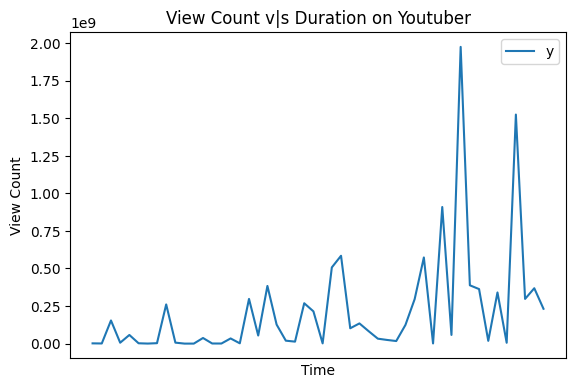

In [ ]:
df1 = pd.DataFrame({'x':t, 'y':v})

df1.plot(x='x', y='y', kind='line')

plt.title("View Count v|s Duration on Youtuber")
plt.xticks([])
plt.xlabel("Time")
plt.ylabel("View Count")
plt.show()


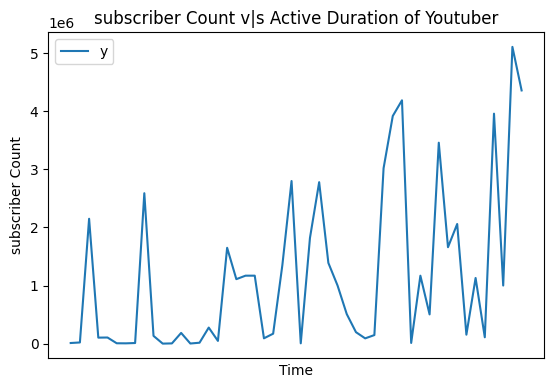

In [ ]:
df1 = pd.DataFrame({'x':t, 'y':s})

df1.plot(x='x', y='y', kind='line')

plt.title("subscriber Count v|s Active Duration of Youtuber")
plt.xticks([])
plt.xlabel("Time")
plt.ylabel("subscriber Count")
plt.show()

# Creating an upload schedule for each category of video

In [ ]:
from datetime import datetime

def time_to_seconds(time_string):
    # Convert the input string to a datetime object
    time_object = datetime.strptime(time_string, '%Y-%m-%dT%H:%M:%SZ')
    
    # Calculate the number of seconds since midnight
    seconds_since_midnight = (time_object - time_object.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds()
    
    # Return the number of seconds since midnight
    return int(seconds_since_midnight)

In [ ]:
def get_time_slot(time_in_seconds):
    """
    This function takes in time of day in seconds(from midnight) as input and returns the time slot it falls in as an integer.
    Each time slot is 4 hours.
    """
    if time_in_seconds < 0 or time_in_seconds > 86400:
        return None
    
    slot_size = 4*60*60 # 4 hours in seconds
    slot_start = 0
    slot_end = slot_size
    slot_num = 1
    
    while slot_end <= 86400:
        if time_in_seconds >= slot_start and time_in_seconds < slot_end:
            return str(slot_num)
        slot_start += slot_size
        slot_end += slot_size
        slot_num += 1
    
    return None


In [ ]:
df_videos['upload_time_sec'] = df_videos['upload_time'].apply(time_to_seconds)
df_videos['time_slot'] = df_videos['upload_time_sec'].apply(get_time_slot)

In [ ]:
ranges = ['0-1000','1000-10000','10000-50000','50000-100000','100000-500000','500000+']
def convert_view_to_range(view):
  if view < 1000:
    return ranges[0]
  elif view < 10000:
    return ranges[1]
  elif view < 50000:
    return ranges[2]
  elif view < 100000:
    return ranges[3]
  elif view < 500000:
    return ranges[4]
  else:
    return ranges[5]

In [ ]:
df_videos['view_range'] = df_videos['view_count'].apply(convert_view_to_range)

Creating features and labels for our model

model aims to maximise `view_count` given video `time_slot` and `category_id`

In [ ]:
X = df_videos[['time_slot','category_id']]
y = df_videos['view_range']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
encoder = OneHotEncoder()
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
model1 = DecisionTreeClassifier(max_depth=10)
model2 = RandomForestClassifier(max_depth=10)
# Fit the model on the training data
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
def get_accuracy(model):
  y_pred = model.predict(X_test)
  count = 0
  for i in y_pred == y_test:
    if i:
      count+=1

  accuracy = count/len(y_test)
  print(accuracy) 

In [ ]:
get_accuracy(model1)
get_accuracy(model2)

0.45263157894736844
0.47368421052631576


# Finding fastest growing channels

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datahack/dataset_datahack_videos.csv')
df['upload_time'] = pd.to_datetime(df['upload_time'])

In [ ]:
grouped_df = df.groupby('channel_title').apply(lambda x: x.sort_values('upload_time'))

# Calculate the daily growth rate for each channel
grouped_df = df.groupby('channel_title').apply(lambda x: x.sort_values('upload_time')).reset_index(drop=True)

grouped_df['days_since_start'] = (grouped_df['upload_time'] - grouped_df.loc[::].groupby('channel_title')['upload_time'].transform('min')).dt.days
grouped_df['daily_growth_rate'] = (grouped_df['view_count'] - grouped_df.groupby('channel_title')['view_count'].shift(1)) / grouped_df['days_since_start']

# Rank the channels by their daily growth rate
ranked_df = grouped_df.groupby('channel_title')['daily_growth_rate'].mean().reset_index().sort_values('daily_growth_rate', ascending=False)

# Select the top channels with the highest growth rate
top_upcoming_channels = ranked_df.head(10)

In [ ]:
print(top_upcoming_channels)

               channel_title  daily_growth_rate
11       Finance With Sharan       11088.212403
12             Gate Smashers        3505.154014
30           R.G Bucket List        2551.687892
6   CA Rachana Phadke Ranade        2367.888532
19               MOinsideHIT         788.815827
31               Rohan Joshi         669.259205
15              Ishaan Arora         488.939385
16    Jenny's Lectures CS IT         479.705959
38          Sudarshan Gurjar         273.632907
22               Nazar Battu         265.655729


In [ ]:
present_top_youtubers = df_channels.sort_values('subscriber_count',ascending=False).head(10)
present_top_youtubers

channel_id                 channel_title  \
26  UCwAdQUuPT6laN-AQR17fe1g                 pranjal kamra   
25  UCe3qdG0A_gr-sEdat5y2twQ      CA Rachana Phadke Ranade   
14  UC1_-cyLlwnmTAesbMgruDpQ                   Nazar Battu   
33  UCNn6AaHharXIbkRleXGboiQ               Mumbiker Nikhil   
39  UCfhbydY40P2Lli9HuBz8cdA                        SeeKen   
47  UChZ0JmGgyOWSU-1iXxPhsVA  Sambhavna Seth Entertainment   
37  UCzgCuuPQa1nMlZP9ruPYDNw               R.G Bucket List   
22  UCRzYN32xtBf3Yxsx5BvJWJw                       warikoo   
43  UCYLS9TSah19IsB8yyUpiDzg                    Jordindian   
7   UC2IuURiiASwNigfQJtXiRdQ            SILENT GIRL GAMING   

                                          description  view_count  \
26  Dedicated to value investing, you will find vi...   368547033   
25  To Learn Stock Market in simplified language c...   231870766   
14  Watch awesome content created across categorie...   573331048   
33  ABOUT ME:\nI LOVE TO VLOG MY LIFE\n\nCamera : ...  1524540220   
39  IMPROVING THE QUALITY OF OUR LIFE BY GAINING K...   295923498   
47  This is the official channel of Sambhavna Seth...  1975052135   
37  Cartoons banata hoon!\n\n\n\nBusiness purpose:...   124390259   
22  warikoo is a serial entrepreneur, a bestsellin...   214606523   
43  Two friends, one from Jordan and the other fro...   584652553   
7   🔔🔔 bell all pe set karlo 🔔🔔plz\n❤️My name =Ani...   260787957   

    subscriber_count  video_count                 created_time  \
26           5110000          418         2011-05-13T16:08:58Z   
25           4360000         1013         2009-03-10T11:52:05Z   
14           4190000          195         2015-12-10T16:07:20Z   
33           3960000         2123         2013-07-03T13:53:50Z   
39           3920000          444         2015-12-29T17:44:47Z   
47           3460000         1568         2014-07-26T20:05:55Z   
37           3020000           16         2016-01-15T17:28:22Z   
22           2800000          861         2017-08-01T09:30:48Z   
43           2780000          185         2016-11-28T23:54:24Z   
7            2590000         1407  2021-03-12T11:47:09.443209Z   

                     uploads  \
26  UUwAdQUuPT6laN-AQR17fe1g   
25  UUe3qdG0A_gr-sEdat5y2twQ   
14  UU1_-cyLlwnmTAesbMgruDpQ   
33  UUNn6AaHharXIbkRleXGboiQ   
39  UUfhbydY40P2Lli9HuBz8cdA   
47  UUhZ0JmGgyOWSU-1iXxPhsVA   
37  UUzgCuuPQa1nMlZP9ruPYDNw   
22  UURzYN32xtBf3Yxsx5BvJWJw   
43  UUYLS9TSah19IsB8yyUpiDzg   
7   UU2IuURiiASwNigfQJtXiRdQ   

                                          other_links  
26  ['https://www.youtube.com/redirect?event=chann...  
25  ['https://www.youtube.com/redirect?event=chann...  
14                                                 []  
33  ['https://www.youtube.com/redirect?event=chann...  
39  ['https://www.youtube.com/redirect?event=chann...  
47  ['http://www.youtube.com/channel/UChZ0JmGgyOWS...  
37                                                 []  
22                                                 []  
43  ['https://www.youtube.com/redirect?event=chann...  
7   ['https://www.youtube.com/redirect?event=chann...

In [ ]:
ranked_df[ranked_df['channel_title']=='pranjal kamra']['daily_growth_rate']

40   -648.900692
Name: daily_growth_rate, dtype: float64

In [ ]:
growth_rate_current_youtubers = []
for yt in present_top_youtubers['channel_title']:
  growth_rate_current_youtubers.append(ranked_df[ranked_df['channel_title']==yt]['daily_growth_rate'])

In [ ]:
growth_rate_current_youtubers[:-2]

[40   -648.900692
 Name: daily_growth_rate, dtype: float64,
 6    2367.888532
 Name: daily_growth_rate, dtype: float64,
 22    265.655729
 Name: daily_growth_rate, dtype: float64,
 21   -5071.798934
 Name: daily_growth_rate, dtype: float64,
 37   -1995.901096
 Name: daily_growth_rate, dtype: float64,
 36    18.968082
 Name: daily_growth_rate, dtype: float64,
 30    2551.687892
 Name: daily_growth_rate, dtype: float64,
 41   -36063.618236
 Name: daily_growth_rate, dtype: float64]

In [ ]:
present_top_youtubers['daily_growth_rate'] = growth_rate_current_youtubers

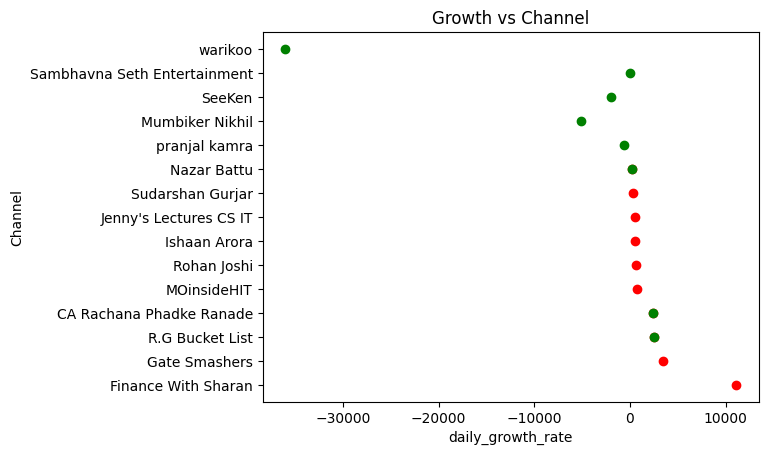

In [ ]:
plt.scatter(top_upcoming_channels['daily_growth_rate'], top_upcoming_channels['channel_title'], c = 'red')
plt.scatter(present_top_youtubers['daily_growth_rate'][:-2], present_top_youtubers['channel_title'][:-2], c = 'green')
# set the x and y axis labels
plt.xlabel('daily_growth_rate')
plt.ylabel('Channel')
plt.title('Growth vs Channel')

# show the graph
plt.show()

# Finding most discussed words for each category

In [ ]:
df = df_videos

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Preprocess the data
df['Comments'] = df['Comments'].apply(lambda x: x.lower())
df['Comments'] = df['Comments'].str.replace('[^\w\s]','')
df['Comments'] = df['Comments'].str.replace('\d+', '')
df['Comments'] = df['Comments'].str.strip()

top_words = {id:[] for id in set(df['category_id'])}


# Find the top most used words in each category
for category_id in set(df['category_id']):
    comments = df[df['category_id']==category_id]['Comments']

    vectorizer = CountVectorizer()
    X_vec = vectorizer.fit_transform(comments)

    feature_names = vectorizer.vocabulary_
    comments_vec = vectorizer.transform(comments)

    word_freq = zip(feature_names, comments_vec.sum(axis=0).tolist()[0])
    word_freq_sorted = sorted(word_freq, key=lambda x: x[1], reverse=True)
    top_words[category_id] = word_freq_sorted[:10]
    print(f'Top words in category {category_id}: {word_freq_sorted[:10]}')    

In [ ]:
pd.DataFrame(top_words)

1                    10                     17  \
0           (monthsi, 796)  (entertainment, 38)  (episodeanyways, 284)   
1               (hun, 774)          (scene, 31)         (esechis, 173)   
2          (fujiwaha, 632)             (or, 22)          (amazon, 144)   
3             (dirty, 493)    (versitality, 21)            (rick, 115)   
4          (attracts, 492)         (future, 18)            (true, 112)   
5               (dog, 478)         (aaliya, 16)           (onnnn, 106)   
6          (greninja, 474)          (china, 15)        (portugese, 95)   
7           (deleted, 413)           (cars, 14)         (cheating, 84)   
8          (motivate, 397)          (thats, 12)             (takp, 73)   
9  (appreciablekudos, 368)            (big, 11)         (mentions, 73)   

                  19                   20                 22  \
0           (ji, 25)     (tamilfree, 700)       (feel, 1551)   
1       (dreams, 23)         (ships, 622)   (promoted, 1518)   
2        (dubai, 23)  (sasukeuchiha, 616)  (transport, 1336)   
3     (personal, 20)          (bhut, 574)    (darshan, 1163)   
4         (more, 19)          (mode, 566)      (youmay, 970)   
5      (deserve, 16)      (quarries, 565)      (vahiya, 936)   
6         (come, 16)    (gamingfree, 453)        (yeha, 903)   
7          (its, 15)         (cycle, 399)     (learned, 857)   
8           (me, 13)    (themselves, 373)         (kem, 819)   
9  (achievement, 13)        (heroic, 346)     (workout, 658)   

                                   23                 24  \
0                       (prdhan, 388)        (आजइय, 633)   
1                  (combination, 301)         (omg, 477)   
2                 (roastingnice, 287)       (tarun, 471)   
3  (teamamusingriigmailcomintro, 253)       (bchpn, 455)   
4                         (ছইটয, 241)      (wonder, 398)   
5                         (দয়ময়, 239)   (enquiries, 313)   
6                 (notification, 213)  (hillarious, 311)   
7               (directorpankaj, 213)        (wali, 306)   
8                          (কসম, 210)        (bada, 298)   
9                        (অধপতন, 205)       (shape, 265)   

                     25                       27  
0       (campaign, 571)      (videogoogle, 2461)  
1       (composed, 499)          (ragging, 2403)  
2            (fav, 493)        (healthier, 2260)  
3         (contro, 493)            (which, 2002)  
4         (doesnt, 459)           (belive, 1789)  
5  (advertisement, 351)             (dull, 1685)  
6           (fire, 340)        (documents, 1587)  
7       (trivedis, 334)  (clientscustomer, 1569)  
8       (immature, 253)      (pleasethere, 1425)  
9          (jawed, 238)         (programs, 1098)

# Using Sentiment Analysis on comments

In [ ]:
!pip install vaderSentiment
!pip install deep-translator
!pip install langdetect
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 8.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=7ee81b0c5720606f6141b0ebf954db24612b724bab24e471f0c953898c475ded
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from langdetect import detect
import codecs
from deep_translator import GoogleTranslator


In [ ]:
!pip3 install emoji==0.6.0
from transformers import pipeline
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

def sent(text):  
  if detect(text)!="en":
    translated=GoogleTranslator(source='auto', target='en').translate(text)
    a=sentiment_pipeline(translated)
  else:
    a=sentiment_pipeline(text)
 
  return a


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49732 sha256=defc675bdbaad2c4c371eca1f3995548249d1527e9e024800f3551094a96ff4f
  Stored in directory: /root/.cache/pip/wheels/70/2a/7f/1a0012c86b1061c6ee2ed9568b1f830f857a51e8e416452af2
Successfully built emoji


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datahack/dataset_datahack_videos.csv')

In [ ]:
def str_to_list_of_lists(input_str):
    # Remove any leading/trailing whitespaces or brackets
    input_str = input_str.strip('[]').strip()

    # Split the input string by '],[' to separate the sublists
    sublists = input_str.split('],[')

    # Create a list of lists from the sublists
    list_of_lists = []
    for sublist in sublists:
        # Remove any remaining brackets and split by comma
        items = sublist.strip('[]').replace("'","").replace('"',"").split(',')

    return items
df['Comments'] = df['Comments'].apply(str_to_list_of_lists)

In [ ]:
var = list(df["Comments"])
for i in range(len(var)):
  for j in range(len(var[i])):
    var[i][j] = str(var[i][j])

for i in range(len(var)):
  for j in range(len(var[i])):
    if len(var[i][j].strip()) <= 15:
      var[i][j] = "placeholder"    

In [ ]:
lstp=[]
lstn=[]
lstneu=[]
j = df["Comments"][0]
pos=0
neg=0
neu=0
for i in j:
  if len(i.strip()) != 22:
    print(len(i.strip()))
    x=sent(i[:128])
    print(x)
  if(x[0]["label"]=='NEU'):
    neu=neu+x[0]["score"]
  if(x[0]["label"]=='POS'):
    pos=pos+x[0]["score"]
  else:
    neg=neg+x[0]["score"]
lstp.append(pos/100)
lstn.append(neg/100)
lstneu.append(neu/100)

107
[{'label': 'NEU', 'score': 0.8828959465026855}]
33
[{'label': 'POS', 'score': 0.992565393447876}]
34
[{'label': 'POS', 'score': 0.9905181527137756}]
23
[{'label': 'POS', 'score': 0.990740180015564}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
23
[{'label': 'POS', 'score': 0.9919695258140564}]
29
[{'label': 'POS', 'score': 0.9875435829162598}]
54
[{'label': 'NEU', 'score': 0.9283159375190735}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
27
[{'label': 'NEU', 'score': 0.9710776805877686}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
33
[{'label': 'POS', 'score': 0.974304735660553}]
24
[{'label': 'POS', 'score': 0.9902991056442261}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
20
[{'label': 'POS', 'score': 0.9300742745399475}]
26
[{'label': 'POS', 'score': 0.9893316030502319}]
11
[{'label': 'NEU', 'score': 0.9380779266357422}]
96
[{'label': 'POS', 'score': 0.9757567644119263}]
30
[{'label': 'POS', 'score': 0.9

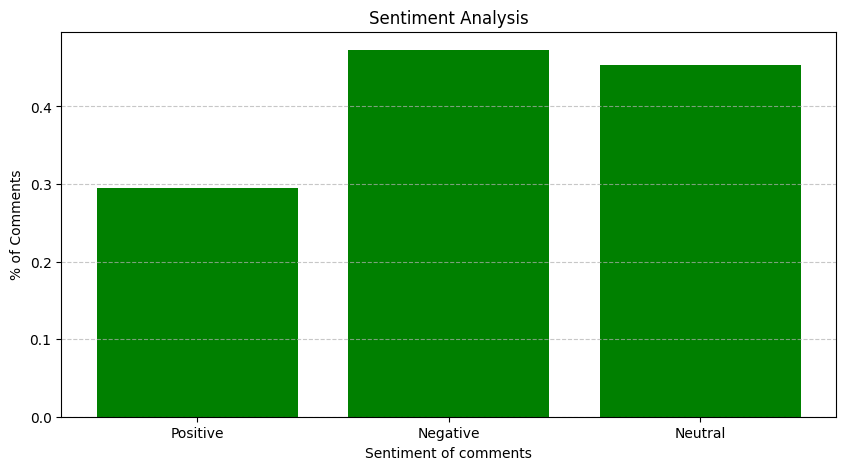

In [ ]:
plt.figure(figsize=(10, 5))
bars = plt.bar(["Positive", "Negative", "Neutral"], [lstp[0], lstn[0], lstneu[0]], color = 'green')
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment of comments")
plt.ylabel("% of Comments")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Using CNN to analyze thumbnails

In [ ]:
from datetime import datetime, timezone

def calc_diff_days(date_str):
  date_obj = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=timezone.utc)
    
  # Get the current datetime in UTC timezone
  now_utc = datetime.now(timezone.utc)
  
  # Calculate the difference between the two datetime objects in days
  diff_days = (now_utc - date_obj).days
  
  # Return the datetime difference in days
  return diff_days


In [ ]:
def calc_date_diff(df):
  df['date_diff'] = df["upload_time"].apply(calc_diff_days)

In [ ]:
def calc_thumbnail_affect(df):
  df['view_ratio'] = df["view_count"]/df['date_diff']

In [ ]:
def has_good_thumbnail(df):
  threshold = 10000 # views per day
  df["good_thumbnail"] = df['view_ratio'].apply(lambda x: x > threshold)

In [ ]:
calc_date_diff(df)
calc_thumbnail_affect(df)
has_good_thumbnail(df)

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import re

def download_thumbnails(df):
    img_array = []
    labels = []
    for i, row in df.iterrows():
        thumbnail_dict = row['thumbnail']
        thumbnail_str = str(thumbnail_dict)
        url_match = re.search(r"'url': '([^']*)'", thumbnail_str)
        if url_match:
            url = url_match.group(1)
            response = requests.get(url)
            img = Image.open(BytesIO(response.content))
            img = img.convert('RGB') # convert to RGB format
            img_array.append(np.array(img))
            labels.append(row['good_thumbnail'])
    return np.array(img_array), labels

In [ ]:
X,y = download_thumbnails(df)

In [ ]:
y = np.array([int(b) for b in y])

In [ ]:
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

def preprocess_images(img_array):
  preprocessed_imgs = []
  for i in range(img_array.shape[0]):
      img = image.array_to_img(img_array[i])
      img = img.resize((120, 90))
      img = image.img_to_array(img)
      img = img / 255.0
      preprocessed_imgs.append(img)
  return np.array(preprocessed_imgs)


In [ ]:
X_processed = preprocess_images(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed,y, test_size=0.3, random_state=40)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import PIL

In [ ]:
# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(90, 120, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
# Compile the model with mean squared error as the loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the image array and views data
model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose = True, shuffle =True)

Epoch 1/10
9/9 [==============================] - 14s 1s/step - loss: 0.9395 - accuracy: 0.6084 - val_loss: 0.5463 - val_accuracy: 0.7576
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 0.5906 - accuracy: 0.7072 - val_loss: 0.5566 - val_accuracy: 0.7576
Epoch 3/10
9/9 [==============================] - 9s 1s/step - loss: 0.5770 - accuracy: 0.7072 - val_loss: 0.5454 - val_accuracy: 0.7576
Epoch 4/10
9/9 [==============================] - 6s 564ms/step - loss: 0.5165 - accuracy: 0.7300 - val_loss: 0.5118 - val_accuracy: 0.8030
Epoch 5/10
9/9 [==============================] - 8s 935ms/step - loss: 0.4653 - accuracy: 0.8213 - val_loss: 0.4904 - val_accuracy: 0.8030
Epoch 6/10
9/9 [==============================] - 7s 680ms/step - loss: 0.3727 - accuracy: 0.8479 - val_loss: 0.6353 - val_accuracy: 0.6364
Epoch 7/10
9/9 [==============================] - 5s 593ms/step - loss: 0.3173 - accuracy: 0.8707 - val_loss: 0.5021 - val_accuracy: 0.7879
Epoch 8/10
9/9 [===========

In [ ]:
y_pred = model.predict(X_test)

5/5 [==============================] - 1s 99ms/step


In [ ]:
good = []
bad = []
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    good.append(i)
  else:
    bad.append(i)  

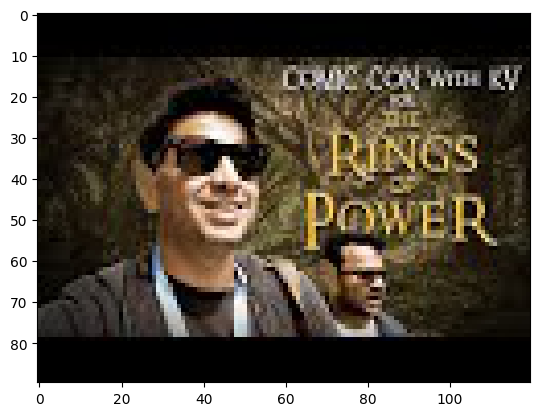

In [ ]:
plt.imshow(X_test[good[3]]) 

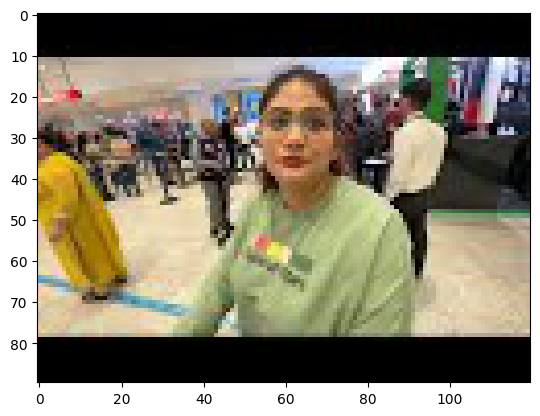

In [ ]:
plt.imshow(X_test[bad[0]]) 

A CNN model was trained on thumbnails deemed to be 'good' or 'bad'.
In this case we have assumed a metric of `views per day`, if a video has the metric above 10000, then it is assumed to be a good video hence the thumbnail must be good. We were able to get a satisfactory accuracy of 77%.

Alternatively, we could have made a dataset of thumbnails using youtube api. We can get `good thumbnails` by getting thumbnails from the top 1000 most watched videos.
We can get `bad thumbnails` by getting thumbnails from videos which are over a year old and still have less then 100 views.
This guarantees a strong dataset and in turn a strong model.